In [3]:
## x轴为时间，y轴为GEX，每3分钟一张柱状图

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta
import time
import math

fileBasePath = "202408\\"
# 读取QQQ数据
filename = fileBasePath + "QQQInterdayOIData.txt"
df = pd.read_csv(filename, sep=",")
# df.columns = ['Time', 'Spot', 'Strike', 'ExpiredDay', 'GEX']
df.columns = ['Time', 'Symbol', 'Strike', 'ExpiredDay', 'Right', 'Volume', 'OI', 'GAMMA', 'Spot']
# df = df[(df["GEX"] != " ∞") & (df["GEX"] != " -∞")]

df['Time'] = df['Time'].astype(str).str.strip().str[4:14]
df['Right'] = df['Right'].astype(str).str.strip()
df['Time'] = df['Time'].str[:-2]
df['Spot'] = df['Spot'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['OI'] = df['OI'].astype(float)
df['GAMMA'] = df['GAMMA'].astype(float)

# GEX 换算成十亿单位
df['CallGEX1'] = np.where(df['Right'] == 'C', (df['GAMMA'])*(df['Volume']+df['OI'])*100*(df['Spot'])*(df['Spot'])*0.01/100**9, 0)
df['PutGEX1'] = np.where(df['Right'] == 'P', -(df['GAMMA'])*(df['Volume']+df['OI'])*100*(df['Spot'])*(df['Spot'])*0.01/100**9, 0)
df['CallGEX'] = np.where(df['Right'] == 'C', (df['GAMMA'])*(df['OI'])*100*(df['Spot'])*(df['Spot'])*0.01/100**9, 0)
df['PutGEX'] = np.where(df['Right'] == 'P', -(df['GAMMA'])*(df['OI'])*100*(df['Spot'])*(df['Spot'])*0.01/100**9, 0)
df['TotalGEX1'] = df['CallGEX1'] + df['PutGEX1']
# 将 'Time' 转换为日期时间格式
df['Time'] = pd.to_datetime(df['Time'], format='%m%d%H%M')

# 读取SPX数据
filename = fileBasePath + "SPXInterdayOIData.txt"
df1 = pd.read_csv(filename, sep=",")
df1.columns = ['Time', 'Symbol', 'Strike', 'ExpiredDay', 'Right', 'Volume', 'OI', 'GAMMA', 'Spot']

df1['Time'] = df1['Time'].astype(str).str.strip().str[4:14]
df1['Right'] = df1['Right'].astype(str).str.strip()
df1['Time'] = df1['Time'].str[:-2]
df1['Spot'] = df1['Spot'].astype(float)
df1['Volume'] = df1['Volume'].astype(float)
df1['OI'] = df1['OI'].astype(float)
df1['GAMMA'] = df1['GAMMA'].astype(float)
# df1['ExpiredDay'] = pd.to_datetime(df1['ExpiredDay'].astype(str).str.strip(), format='%Y%m%d')

# GEX 换算成十亿单位
df1['CallGEX1'] = np.where(df1['Right'] == 'C', (df1['GAMMA'])*(df1['Volume']+df1['OI'])*100*(df1['Spot'])*(df1['Spot'])*0.01/100**9, 0)
df1['PutGEX1'] = np.where(df1['Right'] == 'P', -(df1['GAMMA'])*(df1['Volume']+df1['OI'])*100*(df1['Spot'])*(df1['Spot'])*0.01/100**9, 0)
df1['CallGEX'] = np.where(df1['Right'] == 'C', (df1['GAMMA'])*(df1['OI'])*100*(df1['Spot'])*(df1['Spot'])*0.01/100**9, 0)
df1['PutGEX'] = np.where(df1['Right'] == 'P', -(df1['GAMMA'])*(df1['OI'])*100*(df1['Spot'])*(df1['Spot'])*0.01/100**9, 0)
df1['TotalGEX'] = df1['CallGEX'] + df1['PutGEX']
df1['TotalGEX1'] = df1['CallGEX1'] + df1['PutGEX1']
# 将 'Time' 转换为日期时间格式
df1['Time'] = pd.to_datetime(df1['Time'], format='%m%d%H%M')

# spxDate = pd.Timestamp(year=2024, month=9, day=3, hour=0, minute=0)
# df1= df1[df1['ExpiredDay'] < spxDate]

# 读取NVDA数据
filename = fileBasePath + "NVDAInterdayOIData.txt"
df2 = pd.read_csv(filename, sep=",")
df2.columns = ['Time', 'Symbol', 'Strike', 'ExpiredDay', 'Right', 'Volume', 'OI', 'GAMMA', 'Spot']

df2['Time'] = df2['Time'].astype(str).str.strip().str[4:14]
df2['Right'] = df2['Right'].astype(str).str.strip()
df2['Time'] = df2['Time'].str[:-2]
df2['Spot'] = df2['Spot'].astype(float)
df2['Volume'] = df2['Volume'].astype(float)
df2['OI'] = df2['OI'].astype(float)
df2['GAMMA'] = df2['GAMMA'].astype(float)

# GEX 换算成十亿单位
df2['CallGEX1'] = np.where(df2['Right'] == 'C', (df2['GAMMA'])*(df2['Volume']+df2['OI'])*100*(df2['Spot'])*(df2['Spot'])*0.01/100**9, 0)
df2['PutGEX1'] = np.where(df2['Right'] == 'P', -(df2['GAMMA'])*(df2['Volume']+df2['OI'])*100*(df2['Spot'])*(df2['Spot'])*0.01/100**9, 0)
df2['CallGEX'] = np.where(df2['Right'] == 'C', (df2['GAMMA'])*(df2['OI'])*100*(df2['Spot'])*(df2['Spot'])*0.01/100**9, 0)
df2['PutGEX'] = np.where(df2['Right'] == 'P', -(df2['GAMMA'])*(df2['OI'])*100*(df2['Spot'])*(df2['Spot'])*0.01/100**9, 0)
df2['TotalGEX1'] = df2['CallGEX1'] + df2['PutGEX1']
# 将 'Time' 转换为日期时间格式
df2['Time'] = pd.to_datetime(df2['Time'], format='%m%d%H%M')

# 设置时间间隔
time_interval = pd.Timedelta(minutes=1)

# 获取数据的起始时间和结束时间
start_time = df['Time'].min()
end_time = df['Time'].max()
start_time1 = df1['Time'].min()
end_time1 = df1['Time'].max()
start_time2 = df2['Time'].min()
end_time2 = df2['Time'].max()
start_time = max(start_time, start_time1)
end_time = min(end_time, end_time1)
start_time = max(start_time, start_time2)
end_time = min(end_time, end_time2)

# print(start_time)
# print(end_time)
# 手动设置起始时间
# # 提取年、月、日、时、分
now = datetime.now()
# current_month = now.month
# current_day = now.day
# current_hour = now.hour
# current_minute = now.minute
# 减去30分钟
time_minus_30 = end_time - timedelta(minutes=10)

start_time = pd.Timestamp(year=1900, month=time_minus_30.month, day=time_minus_30.day, hour=time_minus_30.hour, minute=time_minus_30.minute)

# 测试用
# start_time = pd.Timestamp(year=1900, month=8, day=12, hour=9, minute=30)
# end_time = pd.Timestamp(year=1900, month=8, day=12, hour=11, minute=0)

# 分割数据并绘制柱状图
current_time = start_time

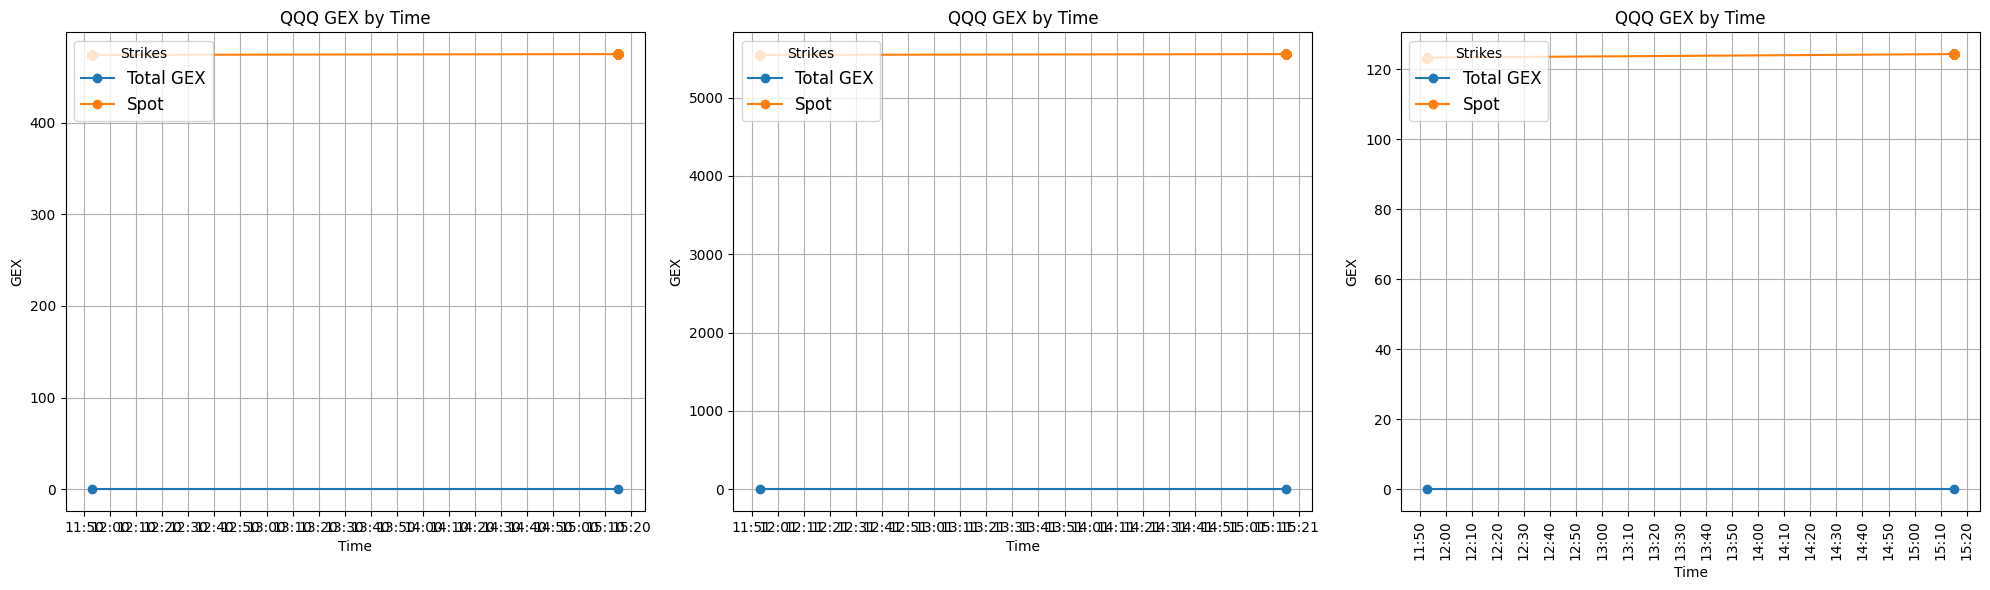

In [4]:
# 初始化变量用于存储上一个时间段的数据
prev_grouped_df = None
prev_grouped_df1 = None
prev_grouped_df2 = None
prev_time = None

grouped_df = df.groupby('Time')[['CallGEX1', 'PutGEX1', 'CallGEX', 'PutGEX', 'TotalGEX1']].sum().reset_index()
grouped_df1 = df1.groupby('Time')[['CallGEX1', 'PutGEX1', 'CallGEX', 'PutGEX', 'TotalGEX1']].sum().reset_index()
grouped_df2 = df2.groupby('Time')[['CallGEX1', 'PutGEX1', 'CallGEX', 'PutGEX', 'TotalGEX1']].sum().reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1, 1]})  # 设置图表大小 (宽度, 高度)

# 第一个子图
# 设置 x 轴刻度，每隔 10 个刻度显示一个刻度
# 第一个子图
# 设置 x 轴刻度，每隔 10 个刻度显示一个刻度
ax1.plot(grouped_df['Time'], grouped_df['TotalGEX1'], marker='o', label='Total GEX')
ax1.plot(df['Time'], df['Spot'], marker='o', label='Spot')

# 设置时间轴格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

ax1.set_xlabel('Time')
ax1.set_ylabel('GEX')
ax1.set_title('QQQ GEX by Time')
ax1.grid(True)
ax1.legend(loc='upper left', title="Strikes", prop={'size': 12})  # 显示图例并设置标题为 "Strikes"


# 第二个子图
ax2.plot(grouped_df1['Time'], grouped_df1['TotalGEX1'], marker='o', label='Total GEX')
ax2.plot(df1['Time'], df1['Spot'], marker='o', label='Spot')

# 设置时间轴格式
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

ax2.set_xlabel('Time')
ax2.set_ylabel('GEX')
ax2.set_title('QQQ GEX by Time')
ax2.grid(True)
ax2.legend(loc='upper left', title="Strikes", prop={'size': 12})  # 显示图例并设置标题为 "Strikes"

# 第三个子图
ax3.plot(grouped_df2['Time'], grouped_df2['TotalGEX1'], marker='o', label='Total GEX')
ax3.plot(df2['Time'], df2['Spot'], marker='o', label='Spot')

# 设置时间轴格式
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

ax3.set_xlabel('Time')
ax3.set_ylabel('GEX')
ax3.set_title('QQQ GEX by Time')
ax3.grid(True)
ax3.legend(loc='upper left', title="Strikes", prop={'size': 12})  # 显示图例并设置标题为 "Strikes"
        
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()     

    